## Import required modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 객체를 생성할 때 sparse 옵션을 이용해서 희소행렬로 리턴할지 밀집행렬로 리턴할지 설정
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [6]:
%pwd

'C:\\Users\\의원1\\git\\TIL\\Data-Analysis'

In [7]:
df = pd.read_csv("../../mysql/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Null values와 불필요한 columns 제거 (결측값 제거)

In [8]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
# DataFrame에서 두 개의 column을 제거 (axis = 1, inplace = True / 열에 대해 적용하여 저장)
df.drop(['Unnamed: 0','Title'], axis=1, inplace=True)

# NaN 인 값을 소유한 row를 제외하며 axis=1 옵션을 추가하면 열을 삭제 
df.dropna(inplace = True)

# 결측값 제거 완료
df.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [10]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object

## Data 전처리

In [11]:
# 자바스크립트 정규표현식 이용한 replace html(<,>,", ' ,\n) 특수문자제거
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)","")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)','')
    ReviewText = ReviewText.str.replace('(&amp)','')
    ReviewText = ReviewText.str.replace('(&gt)','')
    ReviewText = ReviewText.str.replace('(&lt)','')
    ReviewText = ReviewText.str.replace('(\xa0)',' ')
    return ReviewText

df['Review Text'] = preprocess(df['Review Text'])

In [12]:
# TextBlob의 출력 : 극성 과 주관적
# Vader Sentiment 출력 : 네거티브 ( neg ), 중립 ( neu ), 포지티브 ( pos ) 및 복합
df['Polarity'] = df['Review Text'].apply(lambda x : TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x : len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x : len(str(x)))

In [13]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,word_count,review_len
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,53
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62,303
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,98,500
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,22,124
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,36,192


##  Most Postive, Neutral and Negative 극성 리뷰를 체크한다

#### Polarity == 1

In [14]:
cl = df.loc[df.Polarity == 1, ['Review Text']].sample(5).values

for c in cl:
    print(c[0])

Great purchase! i bought the coat to wear to work.
I've been looking for an off the should sweater like this for over a year! looks great on and doesn't itch! can't wait for fall so i can wear it!
The material is great!! got them in both colors and went with a tall size for one. everyone compliments them!
So comfortable-so versatile-so perfect
Beautiful blend of colors and the texture of the shirt is so soft...perfect fall weather garment!


#### Polarity == 0

In [15]:
cl = df.loc[df.Polarity == 0, ['Review Text']].sample(5).values

for c in cl:
    print(c[0])

Looking forward to wearing this on a beach holiday !
I just received this dress and tried it on. it's a nice dress that is flattering but the material was much heavier that i expected it to be. it's way to heavy to wear in the florida heat so unfortunately it's going back.
Can be a bit itchy sometimes, i guess depending on your skin. haven't had a problem with the sweater up to now!
These jeans are my favorite skinny jeans. they are expensive but so worth it. i had nordstrom reinforce holes with patches so they still look distressed but won't rip further. i wear these at least once a week.
The regular length i tried on in store definitely didn't work for me. for reference in the photos i have a medium on and my measurements are 38-30-40.


#### Polarity <= -0.7

In [16]:
cl = df.loc[df.Polarity <= -0.7, ['Review Text']].sample(5).values

for c in cl:
    print(c[0])

Awful color, horribly wrinkled and just a mess...so disappointed
Cut out design, no seems or hems.
 very disappointed in retailer
What a disappointment and for the price, it's outrageous!
The button fell off when i took it out of the bag, and i noticed that all of the thread had unraveled. will be returning :-(
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse


## Distribution of review sentiment polarity score

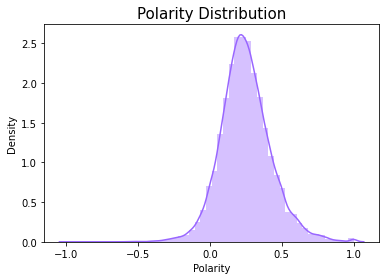

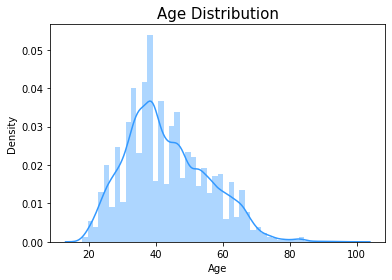

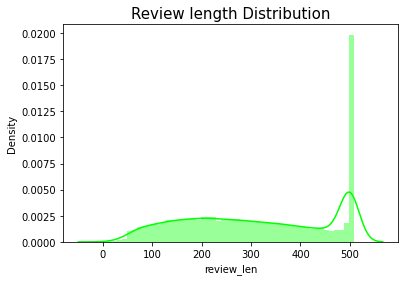

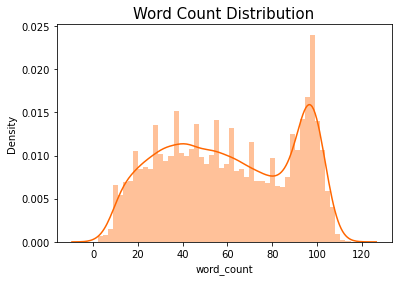

In [17]:
# columns = features , 제목, 색깔 지정
features = ['Polarity','Age','review_len','word_count']
titles = ['Polarity Distribution', 'Age Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

# Distribution with plt,seaborn
for feature, title, color in zip(features, titles, colors):
    # 선 그래프로 변화 추이를 나타내기 위한 시각화 툴
    sns.distplot(x=df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

**1. sentiment 극성 점수가 zero보다 높다. 그 의미는 대부분의 사람들이 매우 긍적적임을 나타낸다**  
**2. 대부분의 리뷰한 사람들의 나이는 30대에서 40대이다.**

## review ratings 분포도  

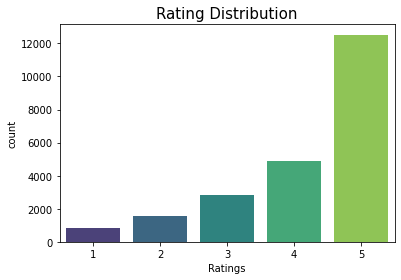

In [23]:
sns.countplot(x = 'Rating', palette = 'viridis', data = df)
plt.title('Rating Distribution', size = 15)
plt.xlabel('Ratings')
plt.show()

## Division Name의 의한 분포도

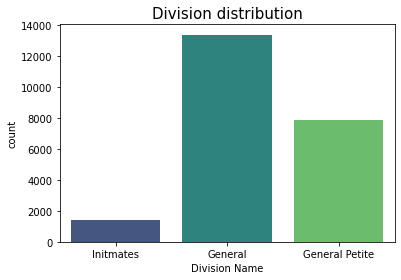

In [34]:
sns.countplot(x = "Division Name", palette='viridis', data=df)
plt.title('Division distribution', size=15)
plt.show()

##### Review의 General division가 가장 많고 Initmates division이 가장 적다.

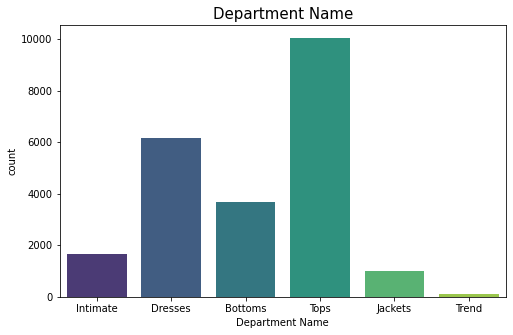

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data =df, x='Department Name', palette='viridis')
plt.title('Department Name', size=15)
plt.show()

## Distribution of Class

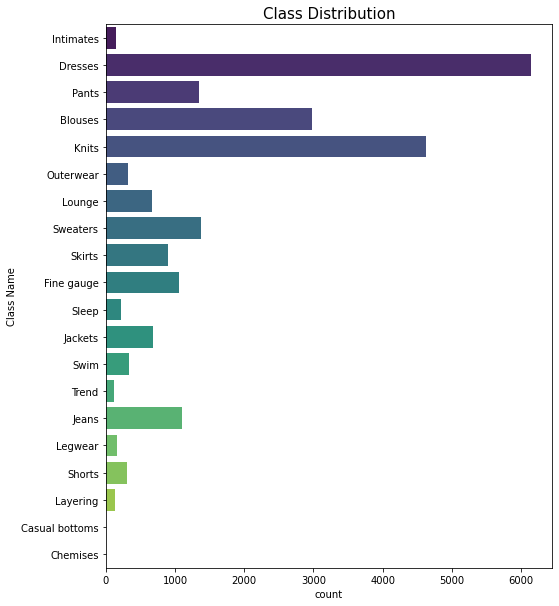

In [36]:
plt.figure(figsize=(8,10))
sns.countplot(data=df, y='Class Name', palette='viridis')
plt.title('Class Distribution', size=15)
plt.show()

In [37]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

In [38]:
stop_words = None
n = 20
unigrams = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

In [39]:
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

### Unigrams Distribution

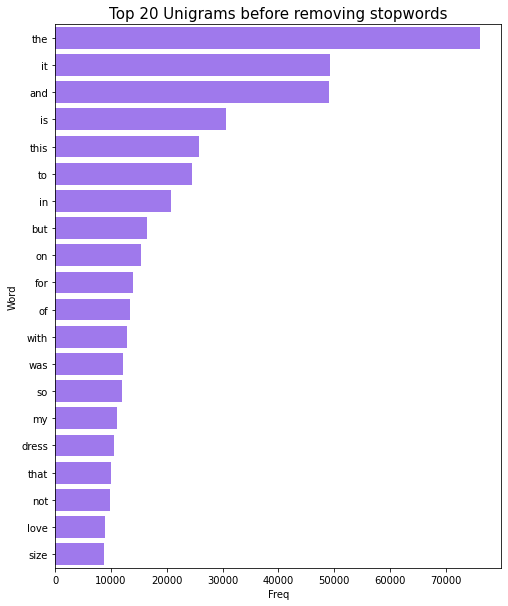

In [40]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams)
plt.title('Top 20 Unigrams before removing stopwords', size=15)
plt.show()

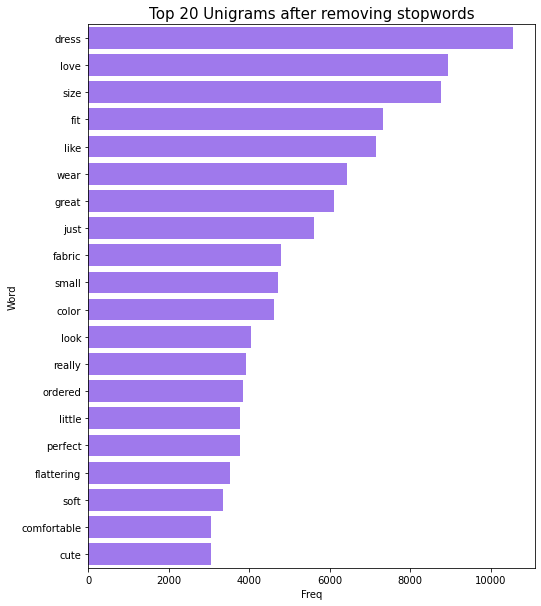

In [41]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

### Bigrams Distribution

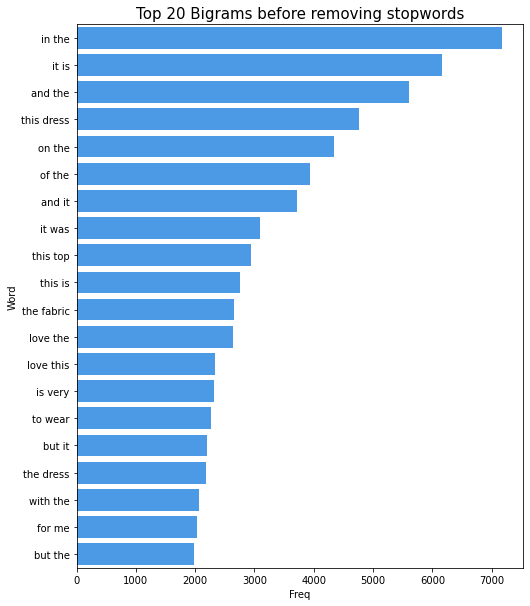

In [42]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams)
plt.title('Top 20 Bigrams before removing stopwords', size=15)
plt.show()

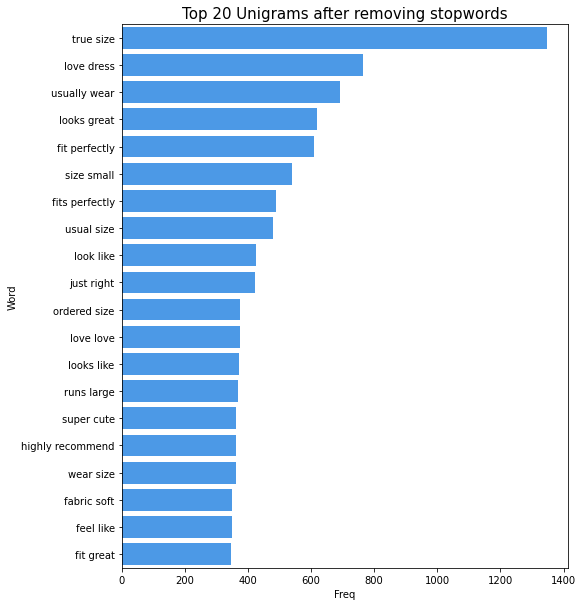

In [43]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

### Trigrams Distribution

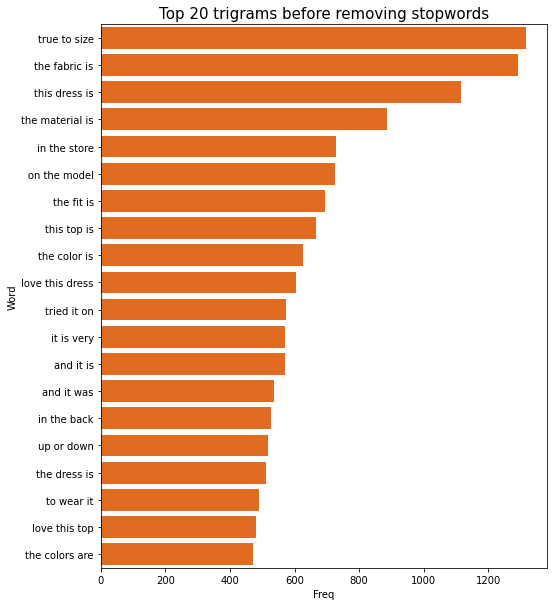

In [44]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams)
plt.title('Top 20 trigrams before removing stopwords', size=15)
plt.show()

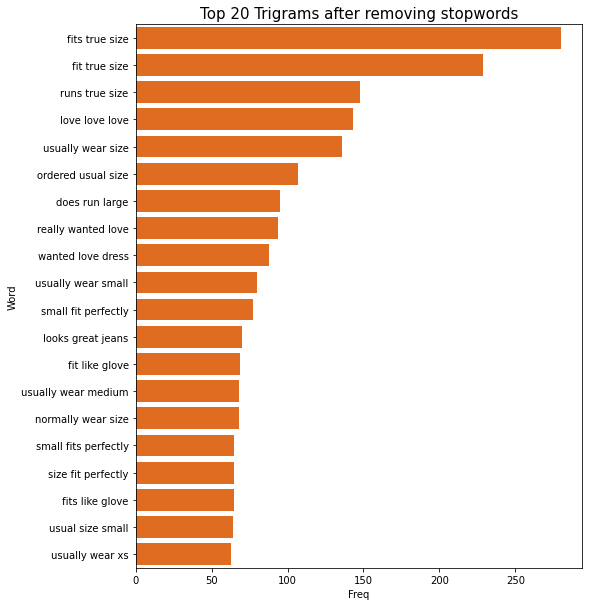

In [45]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams_st)
plt.title('Top 20 Trigrams after removing stopwords', size=15)
plt.show()


### Department name v/s Sentiment Polarity

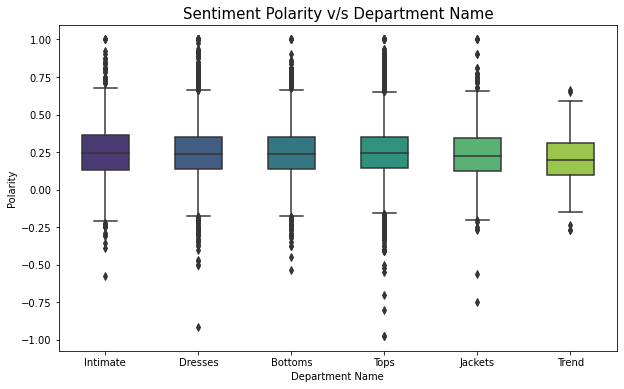

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Polarity', width=0.5, palette='viridis', data=df)
plt.title('Sentiment Polarity v/s Department Name', size=15)
plt.show()

#### Trend department를 제외한 다른 5개의 department는 가장 높은 sentiment 극성을 가졌다. Tops department에서 수집된 극성값은 가장 낮은 sentiment 극성을 보였다. 그리고 Trend부서는 가장 낮은 중앙값 극성을 보였다. Trend부서는 가장 적은 review를 가지고 있으며 이것은 다른 부서만큼 다양한 범위에 분포값이 나오지 않았는지를 설명할 수 있다


### Departments Name v/s Rating

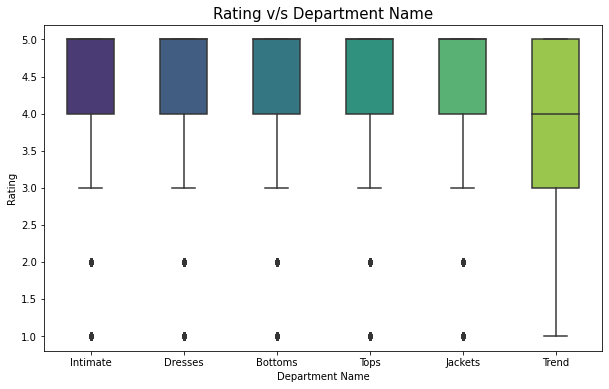

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Rating', width=0.5, palette='viridis', data=df)
plt.title('Rating v/s Department Name', size=15)
plt.show()

#### Trend department를 제외하고 다른 Department의 rating의 중앙값은 5이다. 전체적으로 rating은 높고 sentiment는 review data set에서 긍정적이다.

### Departments Name v/s Review length

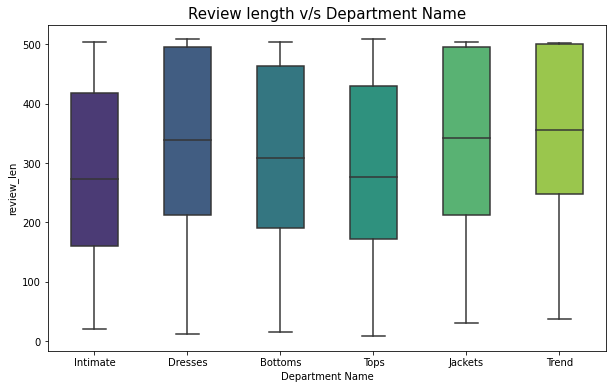

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='review_len', width=0.5, palette='viridis', data=df)
plt.title('Review length v/s Department Name', size=15)
plt.show()

#### Intimate와 Tops의 review_length의 중앙값은 다른 department의 비해 상대적으로 낮다.

---
* ### 추천에 기반한 극성 reviews의 분포
(Recommended IND == 1 / 추천, Recommended IND == 0 / 비추천)

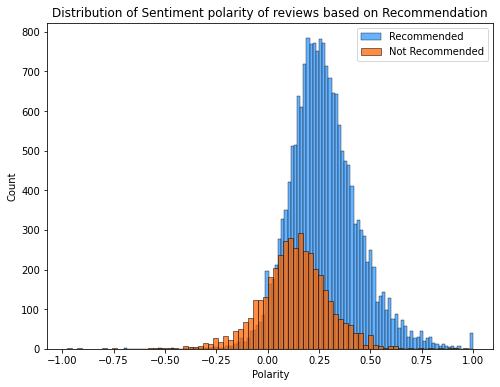

In [52]:
recommend = df.loc[df['Recommended IND'] == 1, 'Polarity']
not_recommend = df.loc[df['Recommended IND'] == 0, 'Polarity']

plt.figure(figsize=(8,6))
sns.histplot(x=recommend, color=colors[1], label='Recommended')
sns.histplot(x=not_recommend, color=colors[3], label='Not Recommended')
plt.title('Distribution of Sentiment polarity of reviews based on Recommendation')
plt.legend()
plt.show()


#### 높은 극성점수를 가지고 있는 review는 추천받게 될 가능성을 가지고 있다.

---
* ### 추천에 기반한 rating reviews의 분포

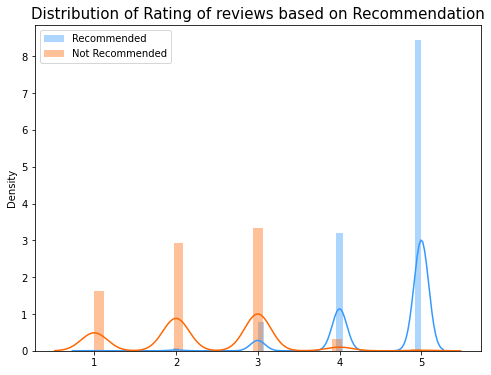

In [53]:
recommended = df.loc[df['Recommended IND'] == 1, 'Rating']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Rating']

plt.figure(figsize=(8, 6))
sns.distplot(x=recommended, color=colors[1], label='Recommended', )
sns.distplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Rating of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

---
* ### 추천에 기반한 Review length의 reviews의 분포

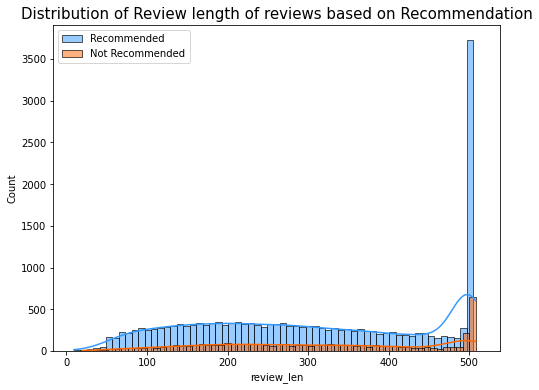

In [54]:
recommended = df.loc[df['Recommended IND'] == 1, 'review_len']
not_recommended = df.loc[df['Recommended IND'] == 0, 'review_len']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], kde=True, label='Recommended', binwidth=8)
sns.histplot(x=not_recommended, color=colors[3], kde=True, label='Not Recommended', binwidth=8)
plt.title('Distribution of Review length of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

#### 추천한 review는 추천하지 않은 review보다 더 길게 쓰는 경향이 있다.